#SVHN Digit Recognition

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g4ku2AzGR0FlfFaRWyfO_NIhdRvGpguBi2GDTHqms63_I2-pBFiBuA
Mounted at /content/drive


In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout, Flatten
from keras import optimizers
import tensorflow as tf

In [ ]:
h5f = h5py.File('/content/drive/MyDrive/Intro to Neural Nets 2/Lab Assignment External/SVHN_single_grey1.h5','r')
# opening file as read-only
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
# loading training, test and validation sets
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

In [ ]:
h5f.close()
# closing the file

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)
# checking shape of data sets

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


There are a total of 120000 records in this data set - which has been split into 42000 for training, 18000 for test and 60000 for validation respectively.
This translates as a 35-15-50 split in terms of percentages for train, test and validation sets respectively.

In [ ]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32):
            ax.imshow(img[i],cmap='gray')
        else:
            ax.imshow(img[i,:,:],cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

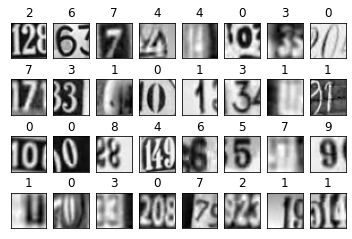

In [ ]:
plot_images(X_train, y_train, 4, 8)
# plotting some training images with label

In [ ]:
plot_images(X_test, y_test, 4, 8)
# plotting some test images with label

In [ ]:
np.unique(y_train)
# checking class labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

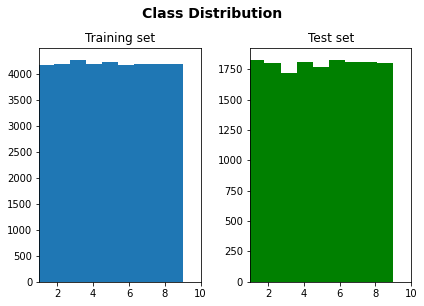

In [ ]:
# plotting  distribution of data
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

The classes look balanced, hence no need for much preprocessing.

In [ ]:
X_train[1][1]
# seeing a record before reshape

array([ 86.688 ,  86.9114,  87.4337,  88.1517,  88.9236,  88.6508,
        89.2639,  89.324 ,  87.2442,  87.5431,  87.922 ,  95.2293,
       105.2884, 106.4425, 105.9587, 105.5288, 103.5829, 103.9465,
       103.3703, 102.4736, 102.0499, 103.3379, 102.8048, 103.4287,
       105.6134, 106.2282, 105.0003, 103.4735, 102.5337,  90.7306,
        87.204 ,  88.5629], dtype=float32)

In [ ]:
# reshaping data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [ ]:
X_train[1][1]
# seeing a record after reshape

87.0685

In [ ]:
# normalizing the features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_val_sc = scaler.transform(X_val)

One hot encoding the labels for train and test data

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [ ]:
print(X_train_sc.shape, X_test_sc.shape,X_val_sc.shape, y_train.shape, y_test.shape,y_val.shape)
# checking shapes after OHE

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


##Neural Network

In [ ]:
tf.keras.backend.clear_session()
# clearing out model from current memory
model = Sequential()
# initializing sequencial model

In [ ]:
model.add(tf.keras.layers.Input(shape=(1024,)))
# input layer

In [ ]:
model.add(tf.keras.layers.BatchNormalization())
# data normalization layer

In [ ]:
model.add(Flatten())
# flatten layer

In [ ]:
model.output_shape
# output shape after flattening

(None, 1024)

In [ ]:
model.add(Dense(512, activation='relu', kernel_initializer='normal'))
# 1st hidden layer

In [ ]:
model.add(Dense(256, activation='relu', kernel_initializer='normal'))
# 2nd hidden layer

In [ ]:
model.add(Dense(64,activation='relu', kernel_initializer='normal'))
# 3rd hidden layer

In [ ]:
model.add(Dense(10,activation='softmax'))
# output layer

###Model Compile

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
# compiling the model

In [ ]:
model.summary()
# reviewing the model 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                6

###Model Fit & Evaluate

In [ ]:
mckpt = tf.keras.callbacks.ModelCheckpoint('svhnd_v1.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
# creating model checkpoints and saving the best performing model

In [ ]:
model.fit(x=X_train_sc, y=y_train, batch_size=64, epochs=50, callbacks=[mckpt], validation_data=(X_val_sc,y_val))
# fitting the model

Epoch 1/50
657/657 [==============================] - 15s 21ms/step - loss: 1.7162 - accuracy: 0.4021 - val_loss: 0.9394 - val_accuracy: 0.7048

Epoch 00001: val_accuracy improved from -inf to 0.70475, saving model to svhnd_v1.h5
Epoch 2/50
657/657 [==============================] - 14s 22ms/step - loss: 0.9351 - accuracy: 0.7026 - val_loss: 0.7690 - val_accuracy: 0.7595

Epoch 00002: val_accuracy improved from 0.70475 to 0.75955, saving model to svhnd_v1.h5
Epoch 3/50
657/657 [==============================] - 14s 21ms/step - loss: 0.7689 - accuracy: 0.7581 - val_loss: 0.6201 - val_accuracy: 0.8091

Epoch 00003: val_accuracy improved from 0.75955 to 0.80908, saving model to svhnd_v1.h5
Epoch 4/50
657/657 [==============================] - 14s 21ms/step - loss: 0.6716 - accuracy: 0.7890 - val_loss: 0.6252 - val_accuracy: 0.8107

Epoch 00004: val_accuracy improved from 0.80908 to 0.81070, saving model to svhnd_v1.h5
Epoch 5/50
657/657 [==============================] - 14s 21ms/step - l

###Model Prediction & Evaluation

In [ ]:
y_pred = svhn_model.predict_classes(X_test_sc, batch_size=64, verbose=1)

 27/282 [=>............................] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


282/282 [==============================] - 1s 4ms/step


In [ ]:
y_pred

array([0, 7, 2, ..., 7, 9, 2])

In [ ]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_c = np.argmax(y_test, axis=1)

In [ ]:
y_test_c

array([1, 7, 2, ..., 7, 9, 2])

In [ ]:
confusion_matrix(y_true=y_test_c, y_pred=y_pred)

array([[1599,   18,   15,   13,   14,   12,   60,   17,   26,   40],
       [  32, 1585,   24,   24,   40,    9,   20,   47,   30,   17],
       [  19,   17, 1567,   24,   16,   13,    6,   78,   23,   40],
       [  16,   25,   35, 1384,    6,  104,   21,   35,   49,   44],
       [  22,   40,   21,   30, 1579,   18,   36,    9,   23,   34],
       [  12,   13,   15,   64,    7, 1499,   67,    5,   34,   52],
       [  41,   16,   14,   12,   22,   65, 1546,    6,   82,   28],
       [  15,   41,   36,   23,    8,    7,   10, 1630,   11,   27],
       [  25,   26,   32,   42,   12,   34,   73,   10, 1497,   61],
       [  49,   21,   29,   21,   13,   39,   10,   18,   48, 1556]])

In [ ]:
accuracy_score(y_test_c, y_pred)

0.8578888888888889

In [ ]:
score = svhn_model.evaluate(X_test_sc, y_test)
print('Test score: ', score[0])
# Loss on test
print('Test accuracy: ', score[1])

563/563 [==============================] - 2s 3ms/step - loss: 0.7518 - accuracy: 0.8579
Test score:  0.7517973184585571
Test accuracy:  0.8578888773918152
